<a href="https://colab.research.google.com/github/RTE404/MoodLens-AI/blob/main/CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    **GAMEPLAN**
    
    1. Setup & Load Data
    i) Install Dependencies & Setup
    ii) Remove Dodgy Images
    iii) Load Data

    2. Preprocessing Data
    i) Scale Data
    ii) Split Data

    3. Deep Model
    i) Build Deep Learning Model
    ii) Train the Model
    iii) Plot Performance

    4. Evaluate Performance
    i) Evaluate
    ii) Test

    5. Save The Model

In [ ]:
import tensorflow as tf
import os
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os

# Path to your zip file (if you uploaded directly, it's just the filename)
file_1_path = '/content/drive/MyDrive/Colab Notebooks/happy.zip'
file_2_path = '/content/drive/MyDrive/Colab Notebooks/sad.zip'

# Where you want to extract it
base_data_path = '/content/data' # This will be the main data folder

extract_path_happy = os.path.join(base_data_path, 'happy')
extract_path_sad = os.path.join(base_data_path, 'sad')

# Create the base_data_path first, then the subdirectories
os.makedirs(extract_path_happy, exist_ok=True) # Creates /content/data/happy
os.makedirs(extract_path_sad, exist_ok=True)   # Creates /content/data/sad

# Unzip happy
with zipfile.ZipFile(file_1_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path_happy)

# Unzip sad
with zipfile.ZipFile(file_2_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path_sad)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import imghdr
import os
data_dir = '/content/data'
image_exts = ['jpeg', 'jpg','bmp', 'png']
# os.listdir(os.path.join(data_dir,'happy'))
for image_class in os.listdir(data_dir):                       # image_class loops through data directory -> happy , sad
  for image in os.listdir(os.path.join(data_dir,image_class)): # image loops through every singe image in image_class (happy,sad)
    image_path = os.path.join(data_dir,image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {} - {}'.format(image_path, e))

Image not in ext list /content/data/sad/depressed-hispanic-girl-with-sad-emotions-and-feelings.jpg.txt


/tmp/ipython-input-2727396555.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Image not in ext list /content/data/sad/image (23).svg
Image not in ext list /content/data/sad/image (1).svg
Image not in ext list /content/data/sad/man-with-head-down.jpg
Image not in ext list /content/data/sad/image (5).svg
Image not in ext list /content/data/sad/image (18).svg
Image not in ext list /content/data/sad/image (10).svg
Image not in ext list /content/data/sad/image (24).svg
Image not in ext list /content/data/sad/image (13).svg
Image not in ext list /content/data/sad/image (14).svg
Image not in ext list /content/data/sad/image (7).svg
Image not in ext list /content/data/sad/depressive-man.jpg.txt
Image not in ext list /content/data/sad/desktop_searchbox_sprites318_hr.webp
Image not in ext list /content/data/sad/mspin_googcolor_medium.svg
Image not in ext list /content/data/sad/24px.svg
Image not in ext list /content/data/sad/image (20).svg
Image not in ext list /content/data/sad/image (21).svg
Image not in ext list /content/data/sad/with-the-blues.jpg.txt
Image not in ext

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
# tf.keras.utils.image_dataset_from_directory??
data = tf.keras.utils.image_dataset_from_directory('data',shuffle=False)
data = data.shuffle(1000, seed=100, reshuffle_each_iteration=False)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()       # get another batch from the iterator

Found 228 files belonging to 2 classes.


In [ ]:
batch[0].shape        # images Represented as numpy arrays

(32, 256, 256, 3)

In [ ]:
batch[1]     # These are the labels : 1 means 'sad' and 0 means 'happy'

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

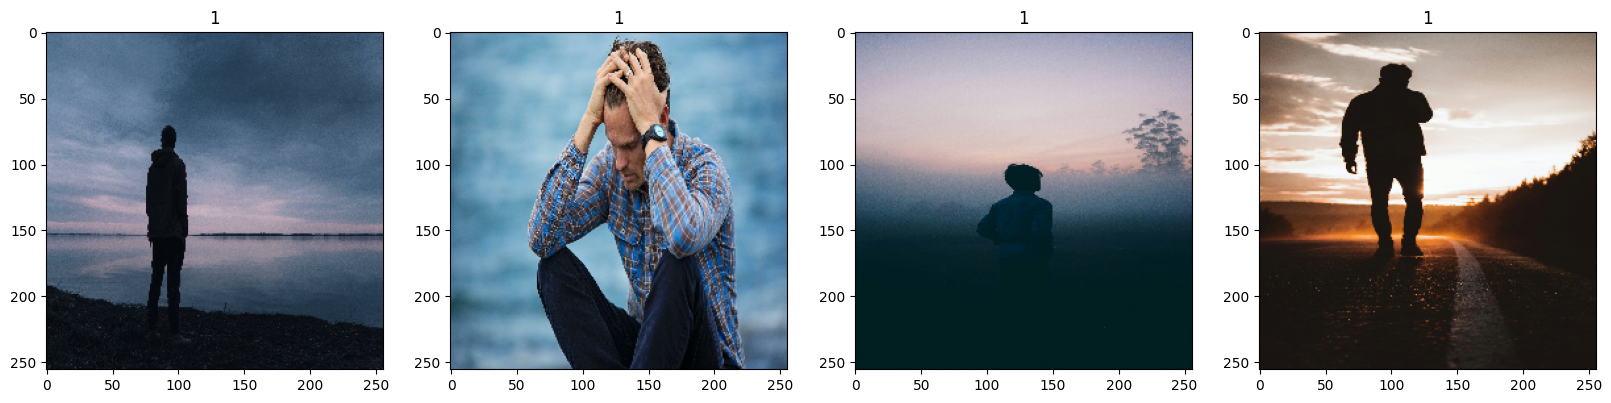

In [ ]:
data = data.map(lambda x,y: (x/255,y))        # Scaling the data in the pipeline as we load it
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))    # Data visualization
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
train_size = int(len(data)*.7)      # Training data (used during training)
val_size = int(len(data)*.2) + 1    # validation data (used during training)
test_size = int(len(data)*.1) + 1   # testing data (used post-training)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
model = tf.keras.models.Sequential([   # Sequential groups a linear stack of layers into a model
    tf.keras.Input(shape=(256,256,3)), # This defines the shape of the input that is 256x256 pixel size with 3 different channels (RGB)

    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # Convolution(): This is our first convolution layer - we define 16 different "filters".
                   # One might look for vertical lines, another for diagonals, another for color shifts.
                   # We get 16 "feature maps" as output.
                   # (3x3) is the kernel size (filter) that goes over whole image to identify features.
                   # 1 is the stride of the kernel. The filter moves 1 pixel at a time.
                   # After convolution, we apply a function called ReLU (Rectified Linear Unit).
                   # It simply turns all negative numbers to 0.
                   # This removes "noise" and keeps only the positive detections.

    # MaxPooling2D(): After finding features, the image is still large and heavy to process.
                    # We need to shrink it while keeping the important info.
                    # Operation: A window (usually 2x2) slides over the feature map.
                    # It looks at 4 pixels and keeps only the largest number (the strongest feature).
                    # Why? It reduces the image size by half (width and height), making the model faster and less prone to overfitting.
                    # It preserves the sharpest features.
                    # Default is a 2x2 pool. This cuts our image dimensions in half.
                    # Our 256x256 maps become 128x128. The depth (16 filters) stays the same.

    tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # Now we look for 32 more complex features (e.g., corners, curves) based on the previous simple lines.
    # Deep learning models usually increase filters (16 to 32 to 64) as they go deeper.
    # Pooling layer shrinks the 128x128 maps down to 64x64.

    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # We reduced the filters back to 16. This is a "bottleneck" to force the model to compress information.
    # Pooling layer shrinks 64x64 down to 32x32.

    tf.keras.layers.Flatten(),
    # Flatten(): The output of the convolution/pooling layers is a stack of 2D grids (like a stack of maps).
               # The "brain" (Dense layers) needs a simple list of numbers.
               # Flatten unrolls this stack into a long 1D line of numbers.
               # At this point, we have a 3D block of data: 32 pixels height x 32 pixels width x 16 maps.
               # Flatten converts this into a single 1D vector of size 32 x 32 x 16 = 16,384 numbers.
               # This massive list of numbers represents "all the features found."

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    # Dense(256): These are standard neural network layers where every input connects to every output.
                # This is a classic neural layer with 256 neurons.
                # It looks at those 16,384 feature numbers and tries to make sense of them, finding non-linear combinations.
                # They look at the global combination of features (e.g., "two eyes + a smile") to make a final classification.

    # Dense(1): A single output neuron. Why 1? Because we're doing binary classification (Happy vs Sad).
              # Result: This neuron will output a single number between 0 and 1.
              # Closer to 0 means "Happy"
              # Closer to 1 means "Sad" (or vice versa, depending on how classes were labeled).
              # activation='sigmoid': The sigmoid function squashes any number into the range, turning it into a probability.
])

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
# This function "configures" the model for training. It wires together three critical components: how to move forward (optimizer),
# how to measure errors (loss), and how to judge performance (metrics).
# Without this step, the model is just a static structure that cannot learn.

# 1) 'adam' (The Optimizer)
# What it is: This is the "coach." It looks at the errors the model made and tells the weights how to adjust to do better next time.
# Why Adam? It stands for Adaptive Moment Estimation. It is the most popular optimizer because it is smart.
# It adjusts the learning speed automatically. It slows down when close to the answer (precision) and speeds up when far away (efficiency).
# Analogy: Imagine walking down a mountain in fog. A basic optimizer takes fixed steps.
#'Adam' takes big jumps when the slope is steep and tiny, careful steps when the terrain gets flat, so you don't overshoot the bottom.

# 2) loss = tf.losses.BinaryCrossentropy()
# What it is: This is the "scorecard" for errors. It calculates a single number representing
# how far the model's prediction was compared to the actual answer.
# Binary: Means "two classes." We are predicting Happy vs. Sad (0 or 1).
# Crossentropy: A fancy mathematical way to measure the distance between two probabilities.

# 3) metrics = ['accuracy']
# This is for us, humans. The loss is a weird math number (like 0.345) that helps the machine learn but is hard for humans to interpret.
# accuracy: This translates the performance into a percentage: "I got 85% of the images correct."
# It doesn't affect the training (the model doesn't use it to update weights),
# but it lets you monitor if the model is actually getting smarter during training.

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
log_dir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.6460 - loss: 1.9571 - val_accuracy: 0.2778 - val_loss: 0.6953
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6660 - loss: 0.6949 - val_accuracy: 0.1111 - val_loss: 0.7157
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7048 - loss: 0.6858 - val_accuracy: 0.1111 - val_loss: 0.7242
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7048 - loss: 0.6804 - val_accuracy: 0.1111 - val_loss: 0.7385
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7048 - loss: 0.6726 - val_accuracy: 0.1111 - val_loss: 0.7695
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7048 - loss: 0.6602 - val_accuracy: 0.1111 - val_loss: 0.8215
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7048 - loss: 0.6449 - val_accuracy: 0.1111 - val_loss: 0.8777
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7048 - loss: 0.6275 - val_accuracy: 0.1944 - val_loss: 0.8944
Epoch 9/

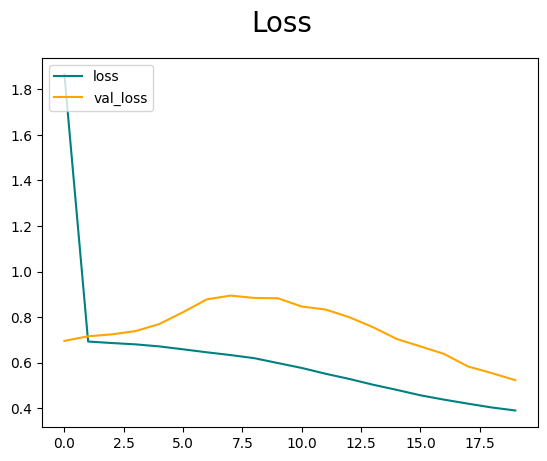

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

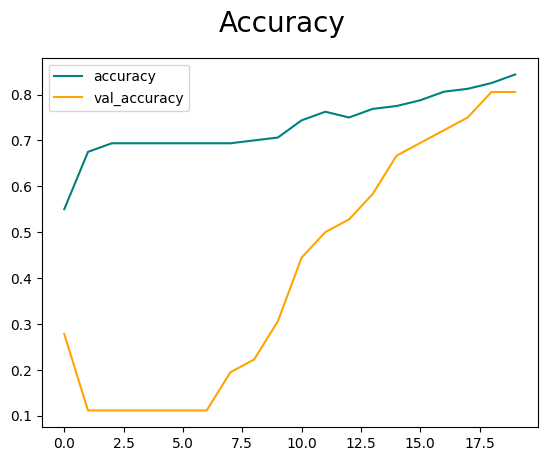

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
Precision:0.0, Recall:0.0, Accuracy:0.6875


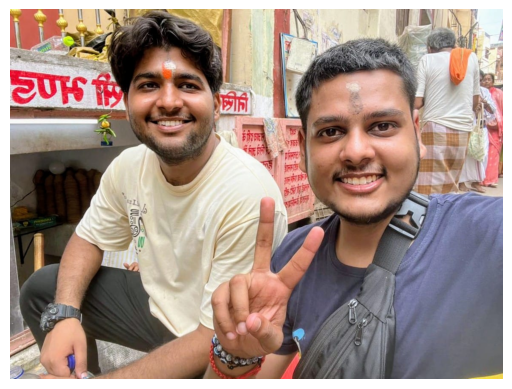

In [ ]:
import cv2
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/test_image.jpg'
# Load the image using OpenCV (cv2) or matplotlib.image.imread
# Assuming cv2 is already imported and used earlier in the notebook
img = cv2.imread(file_path)

# OpenCV reads images in BGR format, matplotlib expects RGB. Convert if necessary.
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Check if the image was loaded successfully before displaying
if img is not None:
    plt.imshow(img)
    plt.axis('off') # Hide axes for better image display
    plt.show()
else:
    print(f"Error: Could not load image from {file_path}")

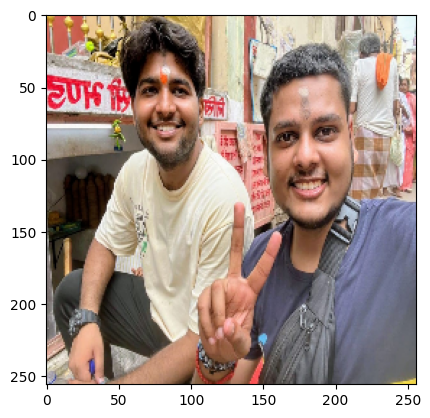

In [ ]:
import tensorflow as tf
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
import numpy as np
np.expand_dims(resize, 0).shape
# we expand the image by 1 dimension because our model doesn't take single image as input.
# It has to take a batch of images.
# So, we just add another parantheses around our single image to convert it into a batch

yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
  print(f'Given image is sad')
else:
  print(f'Given image is happy')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Given image is happy


In [ ]:
from tensorflow.keras.models import load_model

# Save to Google Drive
save_path = '/content/drive/MyDrive/Colab Notebooks/imageclassifier.keras' # Changed extension to .keras
model.save(save_path)
# Load from Drive
new_model = load_model(save_path)

In [ ]:
new_model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

The `new_model` has now been re-compiled with the original settings. You can now use it for further training or evaluation with metrics.